In [ ]:
#諸注意
#情報を専門としていない人間が、コードを書いていますので、至らぬ点がありましたらお知らせください。
#実際の物理量との関連については説明は簡素になっているので、必要に応じて他の資料を参照してください。
#ヒルの式については、次の結果だけ押さえておけば、読めるのではないかと思います。
#p = 1/(1 + (Kd/[L])^n)
#p:結合効率
#Kd:解離定数
#[L]:リガンド濃度
#n:ヒル定数

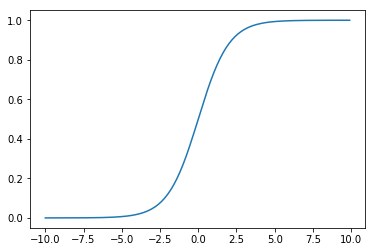

In [19]:
#シグモイド曲線
#生物の中でのスイッチライクな挙動のモデリングによく使われる関数
#ヒルの方程式と等価
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.show()

In [152]:
#ヒル関数へのフィッティングに向けてシグモイド関数を定義しておく。
def sigmoid(x, a, n):
    return 1 / (1 + np.exp(n*(a-x)))

In [155]:
#今回はモデルデータを作成する（実際には実験値）
array_x = np.array(np.linspace(-10,10,30))
list_y = []
#Kd＝１0,n=2のヒル関数に、ガウス分布のノイズを加える（モデルデータ）
for num in array_x:
    list_y.append(sigmoid(num, 1, 2)+0.1*np.random.normal(loc=0.0, scale=0.5, size=None)) 
array_y= np.array(list_y)

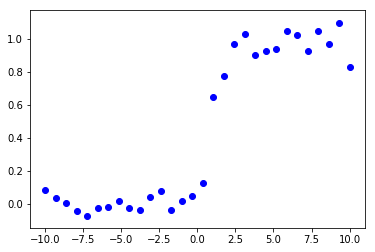

In [156]:
plt.scatter(array_x, array_y,color = "blue")
plt.show()

In [157]:
##フィッティングに用いるライブラリをインストール
from scipy.optimize import curve_fit
#フィッティング
popt, pcov = curve_fit(sigmoid, array_x, array_y) #因数は(関数系、独立変数、従属変数)
#poptはfittingされたparameter。ここでは[a, n]
#pcovは共分散
param

array([7.6921145, 2.0273703])

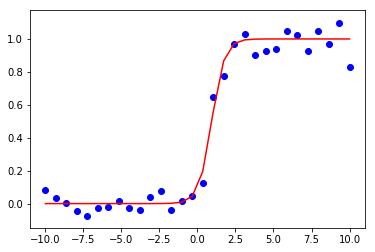

In [158]:
#フィッティングを確認
curve_fit_y = np.array(sigmoid(array_x, popt[0], popt[1]))

plt.scatter(array_x, array_y, color = "blue") #元データ
plt.plot(array_x,curve_fit_y, color = "red")#fitting後
plt.show()

In [159]:
#より具体的な状況がイメージできるプログラムを書いてみる（実用的とは言っていない）
#(a)実際の実験データからヒル関数へのfittingを用いることで、解離定数や1リガンドあたりの結合エネルギーが求まる
#(b)セシウム溶液の濃度と求める効率を入力として、必要なタンパク質発言量を出力する

In [161]:
#(a)
#今回はその辺のデータを適当に用いる（実際には実験値）
list_x = [1,2,3,4,5,10,20]
list_y = [0.21, 0.40, 0.57, 0.73, 0.86, 0.85, 0.97]
array_x = np.array(list_x) #濃度[nM]
array_y = np.array(list_y) #結合率（ITCなど実験的に求まる）

In [162]:
array_log_x = np.log(array_x) 
#ヒル関数における[X]^nがsigmoid関数においてexpに変換されるので、濃度は自然対数で用います

In [168]:
#フィッティング
popt, pcov = curve_fit(sigmoid, array_log_x, array_y) #因数は(関数系、独立変数、従属変数)
#poptはfittingされたparameter。ここでは[Kd, n]
#pcovは共分散
popt

array([0.85881765, 1.71950792])

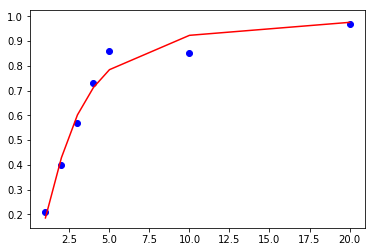

In [164]:
#フィッティングを確認
curve_fit_y = np.array(sigmoid(array_log_x, popt[0], popt[1]))

plt.scatter(array_x, array_y, color = "blue") #元データ
plt.plot(array_x,curve_fit_y, color = "red")#fitting後
plt.show()

In [150]:
#ヒル定数
Hill = popt[1]
Hill

1.7195034380183782

In [169]:
#解離定数
Kd = np.exp(popt[0])
Kd

2.360368259964235

In [170]:
#(b)目標効率、対象溶液濃度に合わせて、タンパク質の必要発現量を算出する
#普通に方程式を立てて解くだけ（立式は省略）
#これの実用性はあまり保証できない
#少なくとも95%か99%かとかの次元になると吸着率が変数としてあまり重要ではないので必要な発現量が一定になる
#パターン１：素直にHill定数で考える
def amont(hill, Kd, L, rate):
    #hill：fittingで求めたヒル関数
    #Kd:fittingで求めたヒル関数
    #L:総セシウム濃度
    #rate:吸着率
    a = rate*L/hill
    b = 1/(L^hill)*(1-rate)*Kd
    return a(1+b)

In [ ]:
#補足：hillの式は一分子内で一部のレセプターだけ占有されている状態を考えていない（全か無）
#これはヘモグロビンへの酸素吸着など協働性のある現象を考える上で、有効である。
#ただしセシウム吸着タンパク質は一分子内に２箇所の結合部位を持つが、これは必ずしも協働的でない
#その場合はhill =1として素直に一次方程式を解くことになる